In [1]:
import numpy as np
from stl import mesh
from pyvista import examples
import pyvista as pv
from dash_vtk.utils import to_mesh_state
import meshcut 
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


In [3]:

mesh2 = pv.read(r'C:/Users/Public/PI/Microscope/E-727/GCS_LabVIEW/MicrofabricationSoftware/3D_examples_models/dinolowRes.stl')
#mesh2.plot(show_edges=True, color=True)
#mesh2.points[:,:].ravel()
mesh2.plot(show_edges = True)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [4]:
def load_stl(stl_fname):
    m = mesh.Mesh.from_file(stl_fname)

    # Flatten our vert array to Nx3 and generate corresponding faces array
    verts = m.vectors.reshape(-1, 3)
    faces = np.arange(len(verts)).reshape(-1, 3)

    #print(verts, "\n \n", faces)
    verts, faces = meshcut.merge_close_vertices(verts, faces)
    return verts, faces


In [5]:
verts,faces = load_stl(r"C:/Users/Public/PI/Microscope/E-727/GCS_LabVIEW\MicrofabricationSoftware/3D_examples_models/dinolowRes.stl")
# A list of Nx3 arrays, each representing a disconnected portion
# of the cross section as a polygone line
#poly_line = meshcut.cross_section(verts, faces, plane_orig=(0, 0, 0), plane_normal=(0, 0, 1))


In [6]:
#Slicing the 3D model ...
def slicer(d, verts, faces):
    poly_lines = list()
    z_max = 100
    z_pos = -20
    while z_pos <= z_max:
        polygon = meshcut.cross_section(verts,faces,plane_orig=(0,0,z_pos),plane_normal=(0,0,1))
        poly_lines.append(polygon)
        z_pos+= d
    return poly_lines


In [7]:
slices = slicer(1, verts, faces)

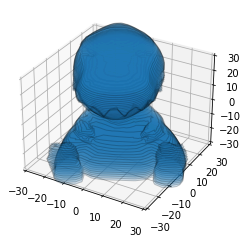

In [8]:
#Ploting the slices ....

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
for poli_line in slices:
    poli = Poly3DCollection(poli_line, alpha=0.2)
    poli.set_edgecolor('k')
    ax.add_collection3d(poli)
    
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-30, 30)
#plt.savefig('dino.jpg')
plt.show()



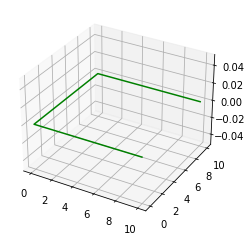

In [9]:
#Visualizing the slices ...
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
# Plot a basic wireframe.
ax.plot_wireframe(np.array([[10,0,0,10]]), np.array([[0,0,10,10]]), np.array([[0,0,0,0]]), rstride=20, cstride=30, color= "green")

plt.show()


In [201]:
#"Metadata of the 3D model"

test = mesh.Mesh.from_file(r"C:/Users/Public/PI/Microscope/E-727/GCS_LabVIEW\MicrofabricationSoftware/3D_examples_models/dinolowRes.stl")
volume, cog, inertia = test.get_mass_properties()
print("Volume                                  = {0}".format(volume))
print("Position of the center of gravity (COG) = {0}".format(cog))
print("Inertia matrix at expressed at the COG  = {0}".format(inertia[0,:]))
print("                                          {0}".format(inertia[1,:]))
print("                                          {0}".format(inertia[2,:]))


Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69


Volume                                  = 139338.37517311165
Position of the center of gravity (COG) = [ 2.28881483 -3.51144087 -0.28910124]
Inertia matrix at expressed at the COG  = [1.23975148e+08 5.47821638e+06 4.90259758e+06]
                                          [ 5.47821638e+06  1.16536093e+08 -3.31549145e+06]
                                          [ 4902597.57584043 -3315491.44516449 51710216.47067593]


In [ ]:
# x, y, z = np.meshgrid(np.linspace(-5, 5, 20),
#                       np.linspace(-5, 5, 20),
#                       np.linspace(-5, 5, 5))

# points = np.empty((x.size, 3))


# points[:, 0] = x.ravel('F')
# points[:, 1] = y.ravel('F')
# points[:, 2] = z.ravel('F')

# # Compute a direction for the vector field
# direction = np.sin(points)**3

# # plot using the plotting class
# pl = pyvista.Plotter()
# pl.add_arrows(points, direction, 0.5)
# pl.show()


# mesh = examples.download_dragon()
# mesh['scalars'] = mesh.points[:, 1]
# mesh.plot(cpos='xy', cmap='plasma', pbr=True, metallic=1.0, roughness=0.6,
#           zoom=1.7)
